In [6]:
# LOGISTIC REGRESSION
# 1 Data Exploration:
# a. Load the dataset and perform exploratory data analysis (EDA).
#b. Examine the features, their types, and summary statistics.
#c. Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
#Analyze any patterns or correlations observed in the data.
#2 Data Preprocessing:
#a. Handle missing values (e.g., imputation).
#b. Encode categorical variables.
#3 Model Building:
#a. Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
#b. Train the model using the training data.
#4 Model Evaluation:
#a. Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
#Visualize the ROC curve.
#5 Interpretation:
#a. Interpret the coefficients of the logistic regression model.
#b. Discuss the significance of features in predicting the target variable (survival probability in this case).
#6 Deployment with Streamlit:
#In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

#(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
#Detailed deployment instructions are available in the Streamlit Documentation.
https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app
Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



In [1]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pickle
import streamlit as st

In [2]:
# Load the dataset
file_path = 'E:\Assignment\Logistic Regression\Titanic_test.csv'
titanic_data = pd.read_csv(file_path)
titanic_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# Display summary statistics for the dataset
print(titanic_data.info())
print(titanic_data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None
        PassengerId      Pclass              Name   Sex         Age  \
count    418.000000  418.000000               418   418  332.000000   
unique          NaN         NaN               418     2         NaN   
top             NaN         NaN  Kelly, Mr. James  male         NaN 

In [4]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [5]:
# Create histograms for numerical features
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']

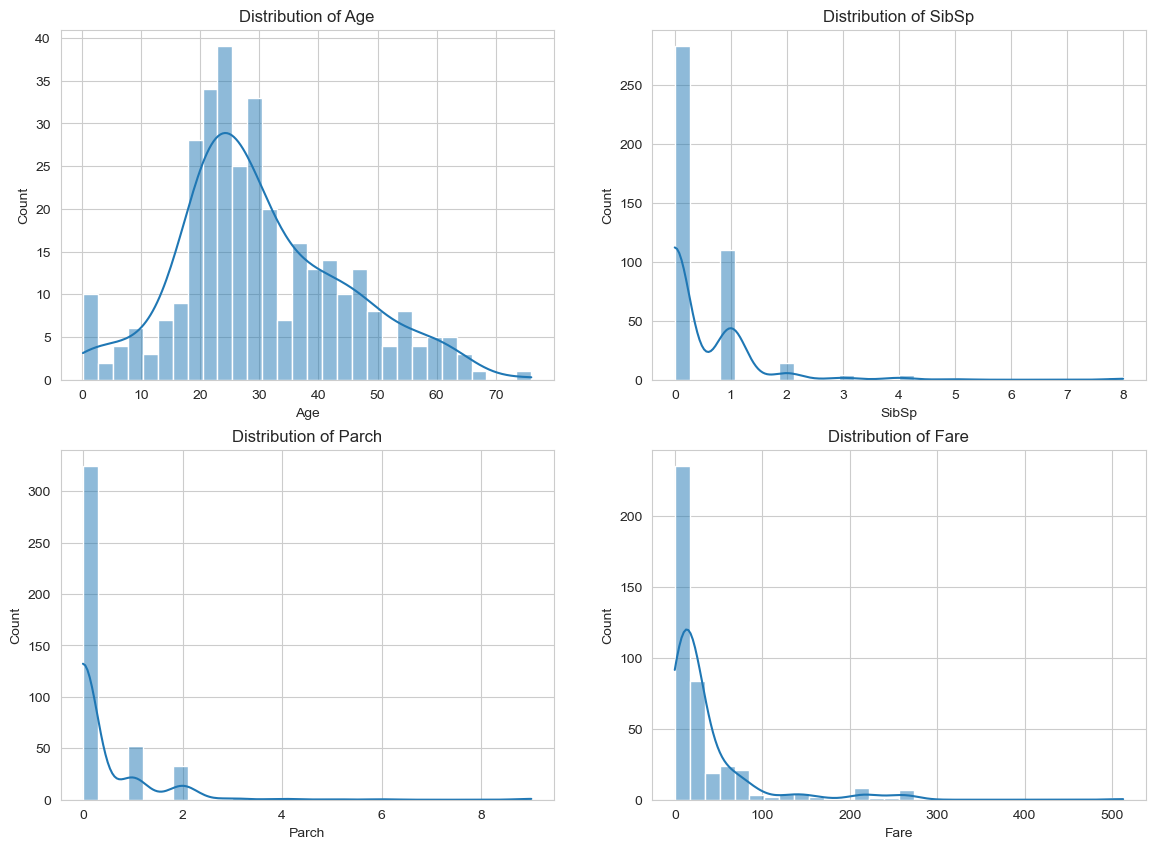

In [6]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(titanic_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')

In [7]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [8]:
# Create box plots for numerical features grouped by Pclass and Sex
plt.figure(figsize=(14, 10))

<Figure size 1400x1000 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

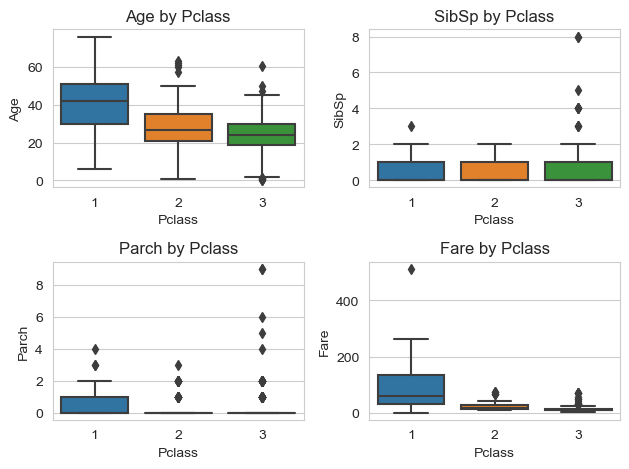

In [9]:
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Pclass', y=feature, data=titanic_data)
    plt.title(f'{feature} by Pclass')

plt.tight_layout()
plt.show()

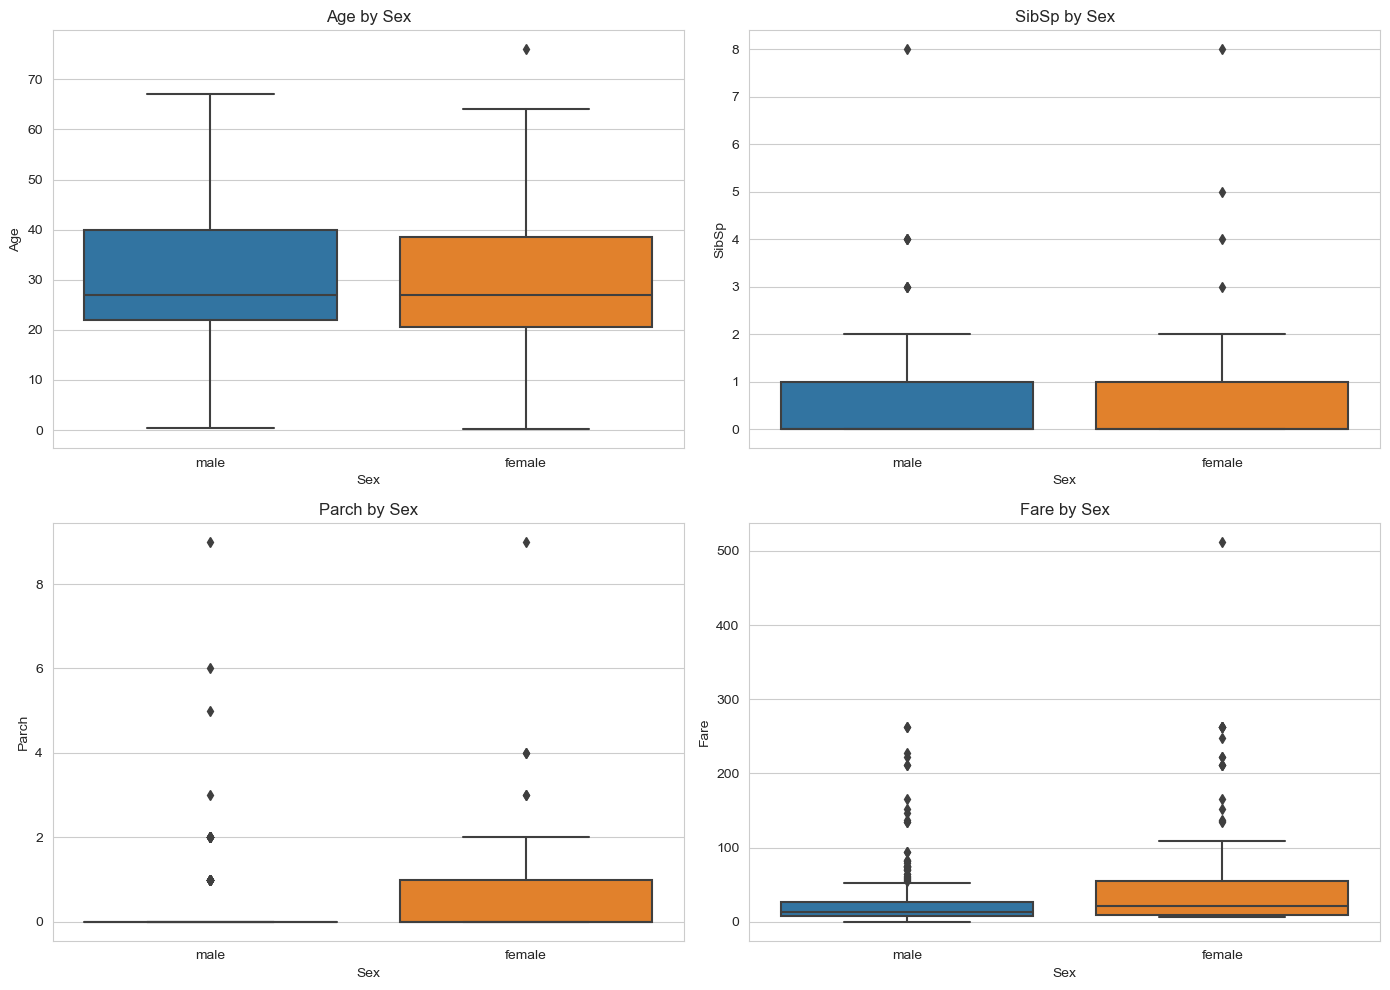

In [10]:
plt.figure(figsize=(14, 10))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Sex', y=feature, data=titanic_data)
    plt.title(f'{feature} by Sex')

plt.tight_layout()
plt.show()

In [11]:
# Handle missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

In [12]:
# Encode categorical variables
titanic_data = pd.get_dummies(titanic_data, columns=['Sex', 'Embarked'], drop_first=True)

In [14]:
# Assuming we have a training dataset with 'Survived' column
# Load the training dataset
train_data = pd.read_csv('E:\Assignment\Logistic Regression\Titanic_train.csv')
# Preprocess the training data
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)

In [15]:
# Define the target variable and features
X_train = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Survived'], axis=1)
y_train = train_data['Survived']

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [17]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Predict the target on the testing data
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

In [19]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)


In [20]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print(f'ROC-AUC score: {roc_auc}')

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1-score: 0.7638888888888888
ROC-AUC score: 0.8824967824967825


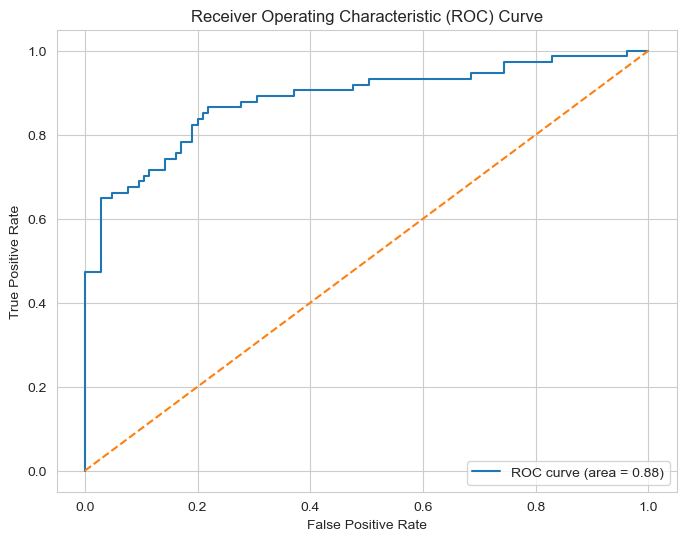

In [21]:
# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [22]:
# Extract and interpret the coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(coefficients)

      Feature  Coefficient
4        Fare     0.002577
1         Age    -0.030596
3       Parch    -0.108342
6  Embarked_Q    -0.112656
2       SibSp    -0.295271
7  Embarked_S    -0.399876
0      Pclass    -0.938300
5    Sex_male    -2.591336


# 1. What is the difference between precision and recall?

* Precision: The ratio of correctly predicted positive observations to the total predicted positives. Precision = TP / (TP + FP)
* Recall: The ratio of correctly predicted positive observations to the all observations in actual class. Recall = TP / (TP + FN)

# 2. What is cross-validation, and why is it important in binary classification?

* Cross-validation: A technique to evaluate the predictive performance of a model by dividing the data into multiple subsets, training the model on some subsets and validating it on the remaining ones.
* Importance: It ensures that the model's performance is robust and generalizes well to unseen data by preventing overfitting and providing a more accurate estimate of the model's performance.